# Notebook for CRN1

This notebook was used to generate all the data about the creation chemical reaction.

In [3]:
import sys
sys.path.append('../')
import numpy as np
import torch
import matplotlib.pyplot as plt
import neuralnetwork_poisson as neuralnetwork
import convert_csv
import generate_data
import simulation
import get_sensitivities
import seaborn
import pandas as pd
from scipy.stats import nbinom
import math
import ode
from scipy.special import comb
from typing import Tuple, Callable
from CRN3_birth import propensities_birth as propensities

## Import data

In [4]:
FILE_NAME = 'CRN3_birth/data'
CRN_NAME = 'birth'
NUM_PARAMS = 1

In [5]:
# loading data
X_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train1.csv')
X_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train2.csv')
X_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train3.csv')
y_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train1.csv')
y_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train2.csv')
y_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train3.csv')
X_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid1.csv')
X_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid2.csv')
X_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid3.csv')
y_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid1.csv')
y_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid2.csv')
y_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid3.csv')
X_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_test.csv')
y_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_test.csv')

train_data1 = [X_train1, y_train1]
valid_data1 = [X_valid1, y_valid1]
train_data2 = [X_train2, y_train2]
valid_data2 = [X_valid2, y_valid2]
train_data3 = [X_train3, y_train3]
valid_data3 = [X_valid3, y_valid3]

INIT_STATE = 5

## Choosing number of components

Neural Network created.


Training ...:  63%|██████▎   | 313/500 [06:55<04:08,  1.33s/it]


Learning rate: 0.0003125,
Train loss: 0.6530354619026184,
 Valid loss: 0.6579017043113708
Neural Network created.


Training ...:  63%|██████▎   | 317/500 [07:02<04:04,  1.33s/it]


Learning rate: 0.0003125,
Train loss: 0.6530860066413879,
 Valid loss: 0.6578897833824158
Neural Network created.


Training ...:  64%|██████▍   | 322/500 [07:28<04:07,  1.39s/it]


Learning rate: 0.0003125,
Train loss: 0.6529778242111206,
 Valid loss: 0.6578447222709656
Computed loss with 1 components - average loss = 0.12252086400985718.
Neural Network created.


Training ...:  68%|██████▊   | 338/500 [10:08<04:51,  1.80s/it]


Learning rate: 0.0003125,
Train loss: 0.3164980709552765,
 Valid loss: 0.3229506313800812
Neural Network created.


Training ...:  63%|██████▎   | 316/500 [09:44<05:40,  1.85s/it]


Learning rate: 0.0003125,
Train loss: 0.3160957396030426,
 Valid loss: 0.3225390911102295
Neural Network created.


Training ...:  64%|██████▍   | 322/500 [09:12<05:05,  1.72s/it]


Learning rate: 0.0003125,
Train loss: 0.3163357377052307,
 Valid loss: 0.3227863013744354
Computed loss with 2 components - average loss = 0.0999929408232371.
Neural Network created.


Training ...:  65%|██████▌   | 327/500 [15:22<08:07,  2.82s/it]


Learning rate: 0.0003125,
Train loss: 0.22028137743473053,
 Valid loss: 0.22607049345970154
Neural Network created.


Training ...:  66%|██████▌   | 331/500 [13:19<06:48,  2.41s/it]


Learning rate: 0.0003125,
Train loss: 0.2205629199743271,
 Valid loss: 0.2263190895318985
Neural Network created.


Training ...:  66%|██████▌   | 331/500 [12:43<06:29,  2.31s/it]


Learning rate: 0.0003125,
Train loss: 0.2202664315700531,
 Valid loss: 0.22601746022701263
Computed loss with 3 components - average loss = 0.09102818369865417.
Neural Network created.


Training ...:  65%|██████▌   | 325/500 [13:49<07:26,  2.55s/it]


Learning rate: 0.0003125,
Train loss: 0.18447169661521912,
 Valid loss: 0.19048289954662323
Neural Network created.


Training ...:  65%|██████▌   | 327/500 [14:18<07:34,  2.62s/it]


Learning rate: 0.0003125,
Train loss: 0.18452739715576172,
 Valid loss: 0.19042375683784485
Neural Network created.


Training ...:  65%|██████▌   | 326/500 [14:17<07:37,  2.63s/it]


Learning rate: 0.0003125,
Train loss: 0.18447917699813843,
 Valid loss: 0.1903834491968155
Computed loss with 4 components - average loss = 0.08683555324872334.
Neural Network created.


Training ...:  68%|██████▊   | 338/500 [16:38<07:58,  2.95s/it]


Learning rate: 0.0003125,
Train loss: 0.16916844248771667,
 Valid loss: 0.17493797838687897
Neural Network created.


Training ...:  69%|██████▉   | 346/500 [40:13<17:54,  6.98s/it]    


Learning rate: 0.0003125,
Train loss: 0.16917014122009277,
 Valid loss: 0.17490096390247345
Neural Network created.


Training ...:  71%|███████▏  | 357/500 [17:46<07:07,  2.99s/it]


Learning rate: 0.0003125,
Train loss: 0.16908501088619232,
 Valid loss: 0.1748511642217636
Computed loss with 5 components - average loss = 0.08468545476595561.
Neural Network created.


Training ...:  63%|██████▎   | 315/500 [17:56<10:31,  3.42s/it]


Learning rate: 0.0003125,
Train loss: 0.16203558444976807,
 Valid loss: 0.1675587147474289
Neural Network created.


Training ...:  64%|██████▍   | 321/500 [17:35<09:48,  3.29s/it]


Learning rate: 0.0003125,
Train loss: 0.16196663677692413,
 Valid loss: 0.16749125719070435
Neural Network created.


Training ...:  64%|██████▍   | 319/500 [1:01:53<35:07, 11.64s/it] 


Learning rate: 0.0003125,
Train loss: 0.16189825534820557,
 Valid loss: 0.16742971539497375
Computed loss with 6 components - average loss = 0.08353363474210103.
Neural Network created.


Training ...:  64%|██████▍   | 320/500 [20:38<11:36,  3.87s/it]


Learning rate: 0.0003125,
Train loss: 0.15842467546463013,
 Valid loss: 0.16399770975112915
Neural Network created.


Training ...:  65%|██████▍   | 323/500 [20:38<11:18,  3.83s/it]


Learning rate: 0.0003125,
Train loss: 0.1584652066230774,
 Valid loss: 0.16406555473804474
Neural Network created.


Training ...:  68%|██████▊   | 340/500 [22:57<10:48,  4.05s/it]


Learning rate: 0.0003125,
Train loss: 0.1584896743297577,
 Valid loss: 0.16405893862247467
Computed loss with 7 components - average loss = 0.08298816283543904.


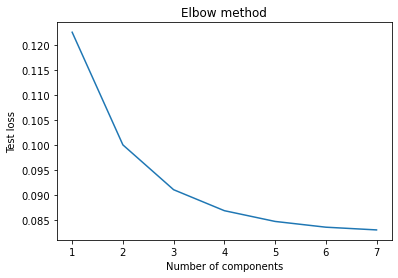

In [5]:
n_comps = np.arange(1, 8)
losses = []
for n in n_comps:
    loss = 0
    for _ in range(3):
        model = neuralnetwork.NeuralNetwork(n_comps=n, n_params=NUM_PARAMS)
        neuralnetwork.train_NN(model, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)
    loss += neuralnetwork.mean_loss(X_test, y_test, model, loss=neuralnetwork.loss_hellinger).detach().item()
    losses.append(loss/3)
    print(f'Computed loss with {n} components - average loss = {loss/3}.')
plt.plot(n_comps, losses)
plt.xlabel('Number of components')
plt.ylabel('Test loss')
plt.title('Elbow method')
plt.show()

In [6]:
N_COMPS = 4

## Training models

We train 3 different models to compare their accuracy.

In [7]:
model1 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS)
model2 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS)
model3 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS)

Neural Network created.
Neural Network created.
Neural Network created.


In [8]:
train_losses1, valid_losses1 = neuralnetwork.train_NN(model1, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)
train_losses2, valid_losses2 = neuralnetwork.train_NN(model2, train_data2, valid_data2, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)
train_losses3, valid_losses3 = neuralnetwork.train_NN(model3, train_data3, valid_data3, loss=neuralnetwork.loss_kldivergence, max_rounds=500, lr=0.01, batchsize=64)

Training ...:  66%|██████▌   | 330/500 [13:24<06:54,  2.44s/it]


Learning rate: 0.0003125,
Train loss: 0.18441767990589142,
 Valid loss: 0.19034670293331146


Training ...:  67%|██████▋   | 335/500 [13:15<06:32,  2.38s/it]


Learning rate: 0.0003125,
Train loss: 0.1840822398662567,
 Valid loss: 0.18998664617538452


Training ...:  66%|██████▋   | 332/500 [13:51<07:00,  2.51s/it]  

Learning rate: 0.0003125,
Train loss: 0.1834391951560974,
 Valid loss: 0.1850169152021408


In [8]:
# Compute losses

print("Training dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_train1, y_train1, model1, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_train1, y_train1, model1, loss=neuralnetwork.loss_hellinger)}')

print("\nValidation dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_valid1, y_valid1, model1, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_valid1, y_valid1, model1, loss=neuralnetwork.loss_hellinger)}')

print("\nTest dataset")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_hellinger)}')


Training dataset
KLD : 0.18449510633945465
Hellinger : 0.26095080375671387

Validation dataset
KLD : 0.19043982028961182
Hellinger : 0.26256871223449707

Test dataset
KLD : 0.18280106782913208
Hellinger : 0.260549932718277


## Distributions plot

To compare predicted distributions to the theoretical ones. Given an initial condition r = 5, the population of $S$ at any later time is a random integer sampled from a Negative Binomial distribution:
$$f(x, t, c) = \binom{k + r - 1}{r-1} (1-e^{-tc})^k(e^{-tc})^r$$


In [9]:
def birth_distribution(x, t, c, r=INIT_STATE):
    return nbinom.pmf(x, r, np.exp(-t*c))

In [21]:
def plot_model(to_pred, 
            models, 
            up_bound=500,
            n_comps=N_COMPS, 
            index_names = ['Probabilities', 'Abundance of species S'], 
            plot_test_result=(False, None), 
            plot_exact_result=True, 
            confidence_interval=False,
            plot = ('distribution', None),
            distribution=birth_distribution,
            init_state = 5,
            save=(False, None)):
    # prediction
    x = torch.arange(up_bound).repeat(1, n_comps,1).permute([2,0,1])
    preds = []
    for i, model in enumerate(models):
        if plot[0] == 'distribution':
            y_pred = neuralnetwork.pred_pdf(model, to_pred, x)
        elif plot[0] == 'sensitivities':
            y_pred = get_sensitivities.sensitivities(to_pred, model, length_output=up_bound)[:, plot[1]+1]
        y_pred = y_pred.detach().numpy()
        pred = pd.DataFrame([np.squeeze(y_pred), np.arange(up_bound)], index = index_names).transpose()
        pred['model'] = f'training{i+1}'
        preds.append(pred)
    if plot_test_result[0]:
        result = plot_test_result[1]
        test_result = pd.DataFrame([np.squeeze(result.detach().numpy()), np.arange(up_bound)], index = index_names).transpose()
        test_result['model'] = 'SSA simulation'
        preds.append(test_result)
    if plot_exact_result:
        exact_result = pd.DataFrame([np.concatenate((np.zeros(init_state), [distribution(i, to_pred[0].numpy(), to_pred[1].numpy()) for i in range(up_bound)])), 
                                    np.arange(up_bound)], index = index_names).transpose()
        exact_result['model'] = 'exact result'
        preds.append(exact_result)
    data = pd.concat(preds, ignore_index=True)
    t = round(np.float64(to_pred[0]),2)
    c = round(np.float64(to_pred[1]),2)
    if confidence_interval:
        seaborn.relplot(data=data, x=index_names[1], y=index_names[0], aspect=1.5, kind='line').set(title=fr'{plot[0]} plot for  $S \rightleftharpoons 2S$ with $t=${t}, $c=${c}')
    else:
        seaborn.relplot(data=data, x=index_names[1], y=index_names[0], hue='model', style='model', aspect=1.5, kind='line').set(title=fr'{plot[0]} plot for  $S \rightarrow 2S$ with $t=${t}, $c=${c}')
    if save[0]:
        plt.savefig(save[1])

In [50]:
def multiple_plots(preds,
            models,
            up_bound,
            n_comps=N_COMPS,
            index_names = ['Probabilities', 'Abundance of species S'],
            plot_test_result=(False, None),
            plot_exact_result=True,
            confidence_interval=False,
            plot = ('distribution', None),
            distribution=birth_distribution,
            init_state = 5,
            n_col = 2,
            save=(False, None)):
    n = len(preds)
    if n == 1:
            plot_model(preds[0], models, n_comps, up_bound, index_names, plot_test_result, plot_exact_result, confidence_interval, plot, distribution, init_state)
    else:
        fig, axes = plt.subplots(math.ceil(n/n_col), n_col, figsize=(12,12))
        for k, to_pred in enumerate(preds):
            x = torch.arange(up_bound[k]).repeat(1, n_comps,1).permute([2,0,1])
            preds = []
            for i, model in enumerate(models):
                if plot[0] == 'distribution':
                    y_pred = neuralnetwork.pred_pdf(model, to_pred, x)
                elif plot[0] == 'sensitivities':
                    y_pred = get_sensitivities.sensitivities(to_pred, model, length_output=up_bound[k])[:, plot[1]+1]
                y_pred = y_pred.detach().numpy()
                pred = pd.DataFrame([np.squeeze(y_pred), np.arange(up_bound[k])], index = index_names).transpose()
                pred['model'] = f'training{i+1}'
                preds.append(pred)
            if plot_test_result[0]:
                result = plot_test_result[1][k]
                test_result = pd.DataFrame([np.squeeze(result.detach().numpy()), np.arange(up_bound[k])], index = index_names).transpose()
                test_result['model'] = 'SSA simulation'
                preds.append(test_result)
            if plot_exact_result:
                exact_result = pd.DataFrame([np.concatenate((np.zeros(init_state), [distribution(i, to_pred[0].numpy(), to_pred[1].numpy()) for i in range(up_bound[k])])), 
                                    np.arange(up_bound[k])], index = index_names).transpose()
                exact_result['model'] = 'exact result'
                preds.append(exact_result)
            data = pd.concat(preds, ignore_index=True)
            t = round(np.float64(to_pred[0]),2)
            c = round(np.float64(to_pred[1]),2)
            if confidence_interval:
                seaborn.lineplot(ax=axes[k//n_col, k%n_col], data=data, x=index_names[1], y=index_names[0])
            else:
                seaborn.lineplot(ax=axes[k//n_col, k%n_col], data=data, x=index_names[1], y=index_names[0], hue='model', style='model')
            axes[k//n_col, k%n_col].set_title(fr'$t=${t}, $c=${c}')
        plt.subplots_adjust(hspace=0.01)
        fig.suptitle(fr'{plot[0]} plot for  $S \rightarrow 2S$')
        if save[0]:
            plt.savefig(save[1])

In [51]:
len(X_test)

1984

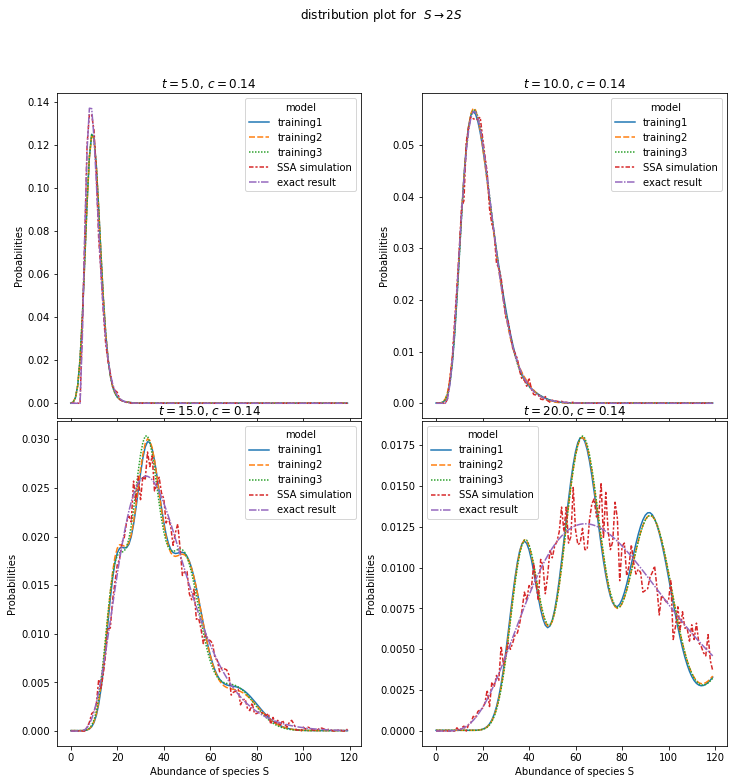

In [52]:
multiple_plots([X_test[992+k,:] for k in range(4)], [model1, model2, model3], up_bound = [120]*4, plot_test_result=(True, [y_test[992+k, :] for k in range(4)]), save=(True, '4distributions.png'))

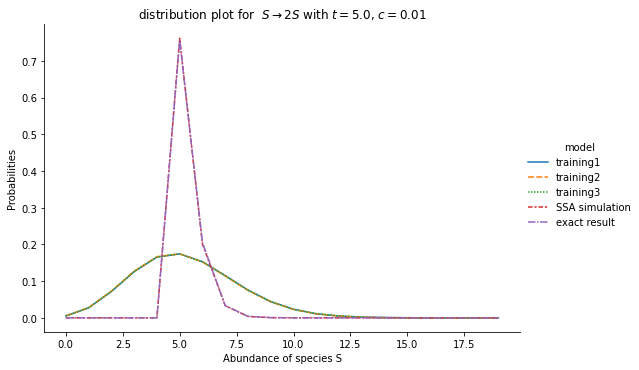

In [25]:
index = 100
plot_model(X_test[index,:], [model1, model2, model3], up_bound = 20, plot_test_result = (True, y_test[index, :]), save=(True, 'interesting.png'))

We can check the accuracy for higher times than those of the traning:

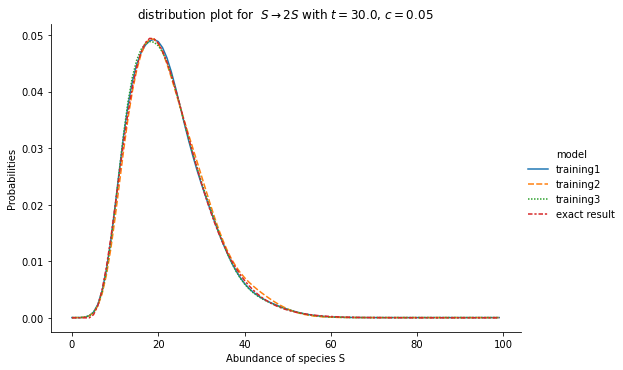

In [111]:
plot_model(torch.tensor([30., 0.05]), [model1, model2, model3], up_bound = 100, confidence_interval=False, save=(True, "t30c005.png"))

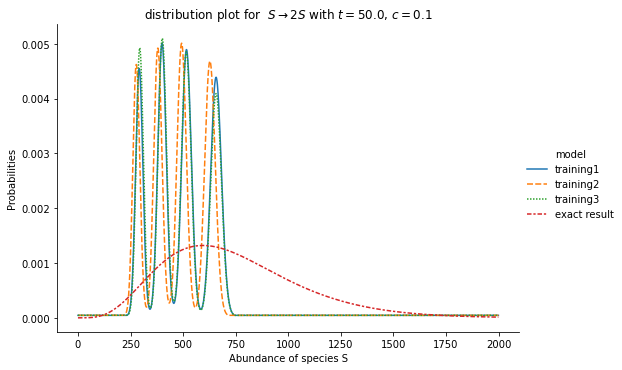

In [28]:
plot_model(torch.tensor([50., 0.1]), [model1, model2, model3], up_bound = 2000, save=(True, 'interesting2.png'))

We can also check the accuracy for parameters outside the bounds of the training.

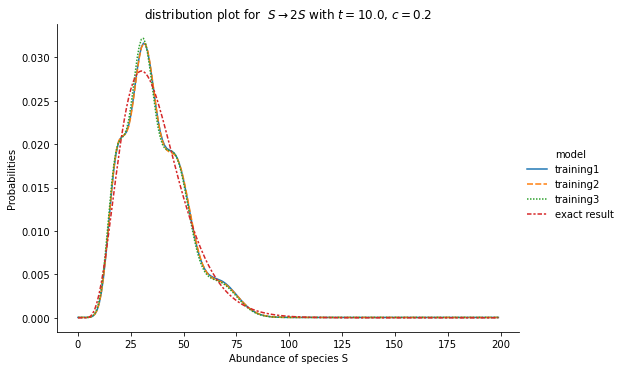

In [30]:
plot_model(torch.tensor([10., 0.2]), [model1, model2, model3], up_bound = 200, confidence_interval=False, save=(True, 'distribution_t10c02.png'))

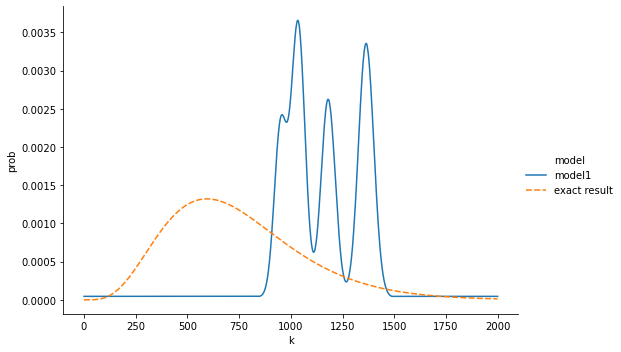

In [117]:
plot_model(torch.tensor([10., 0.5]), [model1, model2, model3], up_bound = 2000)

## Sensitivities plot

To compute sensitivities and compare them to the theoretical ones.

$$\nabla_c f(k, r, c, t) = \binom{k+r-1}{r-1} e^{-ctr}(1-e^{-ct})^{k-1}t(ke^{-ct}-(1-e^{-ct})r)$$

In [36]:
def birth_distribution_sensitivity_c(k, t, c, r=INIT_STATE):
    return comb(k+r-1, r-1) * np.exp(-c*t*r) * (1-np.exp(-c*t))**(k-1) * t * (k*np.exp(-c*t) - (1-np.exp(-c*t))*r)

In [74]:
def get_sensitivities_poisson(input, model, length_output=142, with_probs=False):
    def f(input, length_output=length_output):
        layer_ww, layer_pp = model.forward(input)
        mat_k = torch.arange(length_output).repeat(1,model.n_comps,1).permute([2,0,1])
        return neuralnetwork.mix_nbpdf(layer_pp, layer_ww, mat_k)
    if with_probs: 
        return torch.squeeze(torch.autograd.functional.jacobian(f, input)), f(input).detach()
    return torch.squeeze(torch.autograd.functional.jacobian(f, input))

def expected_val(input, model, length_output=142):
    sensitivity = get_sensitivities(input, model, length_output)
    expec = sensitivity.permute(1,0) * torch.arange(length_output)
    return expec.sum(dim=1)

In [75]:
def plot_sensitivity(to_pred, models, n_comps=N_COMPS, up_bound=1_100, init_state=5, save=(False, None)):
    # prediction
    x = torch.arange(up_bound).repeat(1, n_comps,1).permute([2,0,1])
    preds = []
    for i, model in enumerate(models):
        y_pred = get_sensitivities_poisson(to_pred, model, length_output=up_bound)[:,1]
        y_pred = y_pred.detach().numpy()
        pred = pd.DataFrame([np.squeeze(y_pred), np.arange(up_bound)], index = ['Sensitivities', 'Abundance of species S']).transpose()
        pred['model'] = f'model{i+1}'
        preds.append(pred)
    exact_result = pd.DataFrame([np.concatenate((np.zeros(init_state), [birth_distribution_sensitivity_c(k, to_pred[0].numpy(), to_pred[1].numpy()) for k in range(up_bound)])), np.arange(up_bound)], index = ['Sensitivities', 'Abundance of species S']).transpose()
    exact_result['model'] = 'exact result'
    preds.append(exact_result)
    data = pd.concat(preds, ignore_index=True)
    seaborn.relplot(data=data, x='Abundance of species S', y='Sensitivities', hue='model', style='model', aspect=1.5, kind='line')
    # seaborn.relplot(data=data, x='k', y='prob', aspect=1.5, kind='line')
    if save[0]:
        plt.savefig(save[1])

In [76]:
def multiple_plots(preds,
            models,
            up_bound,
            n_comps=N_COMPS,
            index_names = ['Probabilities', 'Abundance of species S'],
            plot_test_result=(False, None),
            plot_exact_result=True,
            confidence_interval=False,
            plot = ('distribution', None),
            distribution=birth_distribution_sensitivity_c,
            init_state = 5,
            n_col = 2,
            save=(False, None)):
    n = len(preds)
    if n == 1:
            plot_model(preds[0], models, n_comps, up_bound, index_names, plot_test_result, plot_exact_result, confidence_interval, plot, distribution, init_state)
    else:
        fig, axes = plt.subplots(math.ceil(n/n_col), n_col, figsize=(12,12))
        for k, to_pred in enumerate(preds):
            x = torch.arange(up_bound[k]).repeat(1, n_comps,1).permute([2,0,1])
            preds = []
            for i, model in enumerate(models):
                if plot[0] == 'distribution':
                    y_pred = neuralnetwork.pred_pdf(model, to_pred, x)
                elif plot[0] == 'sensitivities':
                    y_pred = get_sensitivities_poisson(to_pred, model, length_output=up_bound[k])[:, plot[1]+1]
                y_pred = y_pred.detach().numpy()
                pred = pd.DataFrame([np.squeeze(y_pred), np.arange(up_bound[k])], index = index_names).transpose()
                pred['model'] = f'training{i+1}'
                preds.append(pred)
            if plot_test_result[0]:
                result = plot_test_result[1][k]
                test_result = pd.DataFrame([np.squeeze(result.detach().numpy()), np.arange(up_bound[k])], index = index_names).transpose()
                test_result['model'] = 'SSA simulation'
                preds.append(test_result)
            if plot_exact_result:
                exact_result = pd.DataFrame([np.concatenate((np.zeros(init_state), [distribution(i, to_pred[0].numpy(), to_pred[1].numpy()) for i in range(up_bound[k])])), 
                                    np.arange(up_bound[k])], index = index_names).transpose()
                exact_result['model'] = 'exact result'
                preds.append(exact_result)
            data = pd.concat(preds, ignore_index=True)
            t = round(np.float64(to_pred[0]),2)
            c = round(np.float64(to_pred[1]),2)
            if confidence_interval:
                seaborn.lineplot(ax=axes[k//n_col, k%n_col], data=data, x=index_names[1], y=index_names[0])
            else:
                seaborn.lineplot(ax=axes[k//n_col, k%n_col], data=data, x=index_names[1], y=index_names[0], hue='model', style='model')
            axes[k//n_col, k%n_col].set_title(fr'$t=${t}, $c=${c}')
        plt.subplots_adjust(hspace=0.01)
        fig.suptitle(fr'{plot[0]} plot for  $S \rightarrow 2S$')
        if save[0]:
            plt.savefig(save[1])

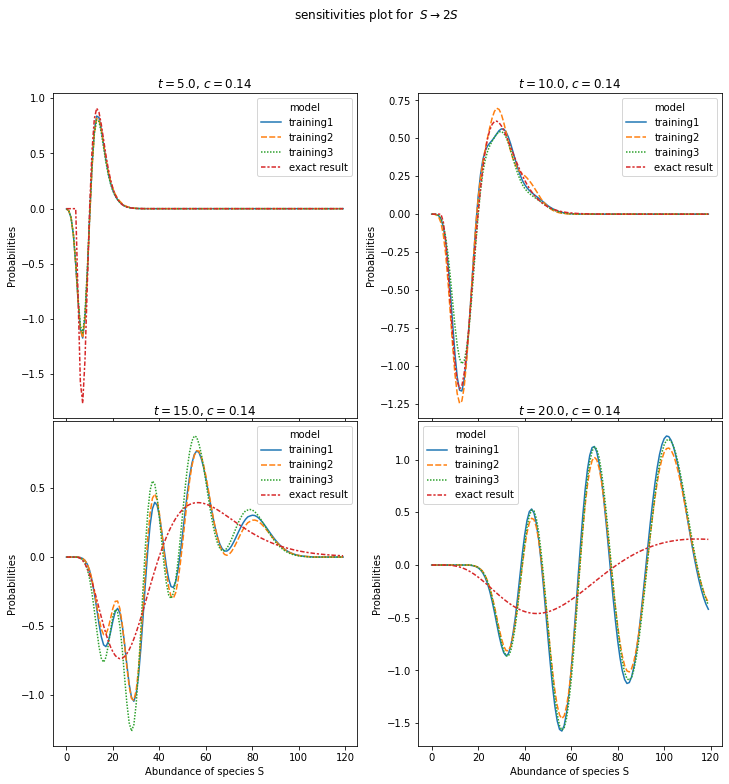

In [58]:
multiple_plots([X_test[992+k,:] for k in range(4)], [model1, model2, model3], up_bound = [120]*4, plot=('sensitivities', 0), save=(True, 'sensitivities_4distributions.png'))

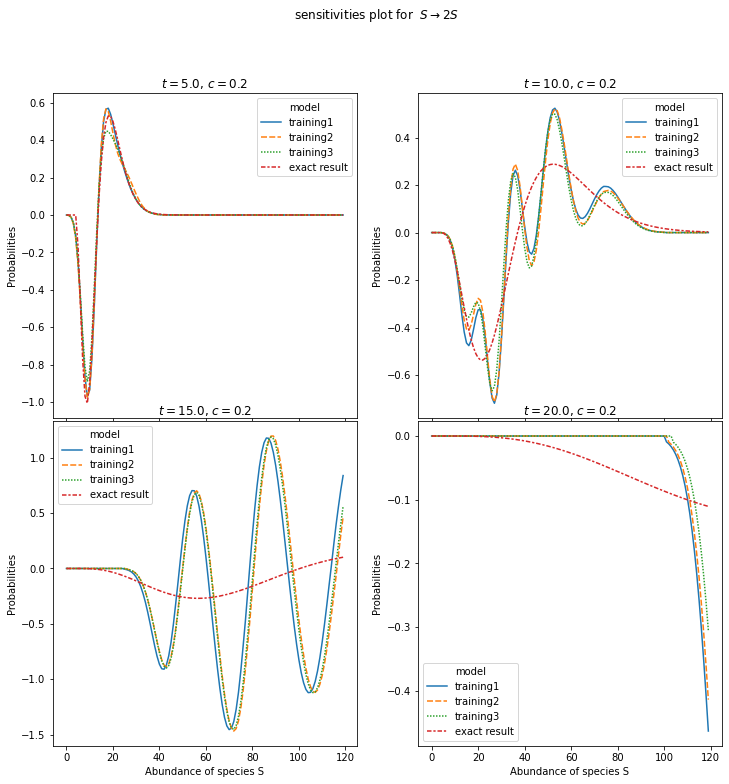

In [110]:
multiple_plots([torch.tensor([5*(k+1), 0.2]) for k in range(4)], [model1, model2, model3], up_bound = [120]*4, plot=('sensitivities', 0), save=(True, 'sensitivities_4distributions.png'))

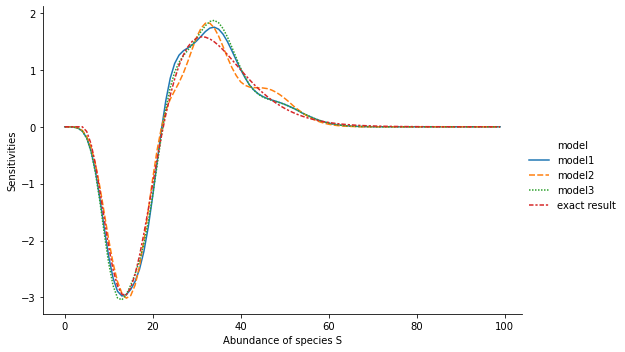

In [112]:
plot_sensitivity(torch.tensor([30., 0.05]), [model1, model2, model3], up_bound=100, save=(True, 'sensitivities_t30c005.png'))

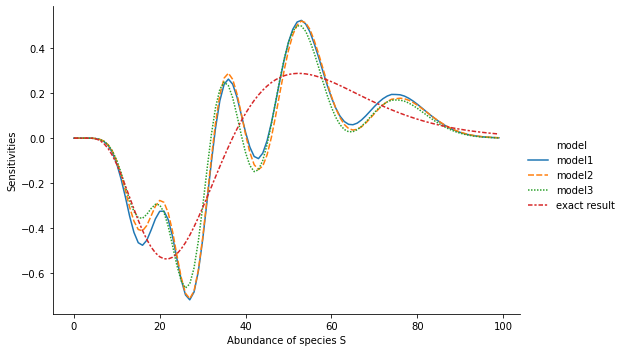

In [113]:
plot_sensitivity(torch.tensor([10., 0.2]), [model1, model2, model3], up_bound=100, save=(True, 'sensitivities_t10c02.png'))

In [105]:
def exact_fi(t, c, r=INIT_STATE, up_bound=1_000):
    res = 0
    for k in range(up_bound):
        res += birth_distribution(k, t, c, r)*t**2*(k/(np.exp(c*t)-1)-r)**2
    return res

In [106]:
exact_fi(5, 0.05)

565.1014580234752

In [77]:
def fi_table_multiple(time_samples, 
            params, 
            ind_param, 
            models = (False, None, 3),
            exact: Tuple[bool, Callable] =(False, None), 
            fsp = (False, np.zeros(1), [], 10, None),
            up_bound = 100):
    rows = [fr'$t={t}$' for t in time_samples]
    n_rows = len(time_samples)
    # compute probabilities and sensitivities with the neural networks
    if models[0]:
        probabilities_m = np.zeros((len(time_samples),up_bound))
        stv_m = np.zeros((len(time_samples),up_bound, len(params)))
        x = torch.arange(up_bound).repeat(1, models[2],1).permute([2,0,1])
        for model in models[1]:
            for i, t in enumerate(time_samples):
                to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))
                sens, probs = get_sensitivities_poisson(to_pred, model, length_output=up_bound, with_probs=True)
                probabilities_m[i,:] += probs[:,0].numpy()
                stv_m[i,:,:] += sens[:,1:].numpy()
        probabilities_m /= len(models[1])
        stv_m /= len(models[1])
        # compute FIM
        predicted_fi = np.zeros(n_rows)
        for i in range(n_rows):
            fim_m = ode.fisher_information_t(probabilities_m[i,:], stv_m[i,:,:])
            predicted_fi[i] = fim_m[ind_param, ind_param]
    # compute probabilities and sensitivities with the FSP
    if fsp[0]:
        crn = simulation.CRN(fsp[1], fsp[2], len(params))
        stv_calculator = ode.SensitivitiesDerivation(crn, fsp[3])
        n_cr = int(fsp[3]*(fsp[3]+3)/2+1)
        if fsp[4]:
            init_state = fsp[4]
        else:
            init_state = np.zeros(2*n_cr)
            init_state[1] = 1
            init_state = np.stack([init_state]*crn.n_reactions)
        probs_fsp, stv_fsp = stv_calculator.get_sensitivities(init_state, 0, time_samples[-1], params.numpy(), t_eval=time_samples)
        fsp_fi = np.zeros(n_rows)
        for i in range(n_rows):
            fim = ode.fisher_information_t(probs_fsp[i,:], stv_fsp[i,:,:])
            fsp_fi[i] = fim[ind_param, ind_param]
    # add condition for models and fsp
    columns = []
    data = []
    # gathering data
    if models[0]:
        columns.append('Predicted with NN')
        data.append(np.round(predicted_fi,3))
    if fsp[0]:
        columns.append('Estimated with FSP')
        data.append(np.round(fsp_fi, 3))
    if exact[0]:
        columns.append('Exact')
        exact_fi = np.zeros(n_rows)
        for i, t in enumerate(time_samples):
            exact_fi[i] = exact[1](t, params.numpy())
        data.append(np.round(exact_fi,3))
    if len(data)==1:
        data = np.array(data).T
    else:
        data = np.stack(data, axis=-1)
    #plot
    fig, ax = plt.subplots(figsize=(8,3))
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    table = plt.table(cellText=data, colLabels=columns, rowLabels=rows, loc='center', cellLoc='center', colWidths=[1.]*len(columns))
    table.set_fontsize(14)
    table.scale(0.4,1.6)
    plt.subplots_adjust(left=0.2, bottom=0.2)
    fig.suptitle(f'Fisher Information - parameter n°{ind_param} - parameter values {params}')
    plt.show()

/var/folders/tq/795v7745669dnb2z48kn2vzw0000gn/T/ipykernel_51611/2058998717.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))


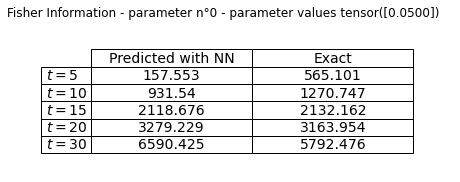

In [108]:
fi_table_multiple([5, 10, 15, 20, 30], torch.tensor([0.05]), ind_param=0, models = (True, [model1, model2, model3], N_COMPS), exact=(True, exact_fi))#, fsp=(True, propensities.stoich_mat, propensities.propensities, 100, None))

/var/folders/tq/795v7745669dnb2z48kn2vzw0000gn/T/ipykernel_51611/2058998717.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  to_pred = torch.concat((torch.tensor([t]), torch.tensor(params)))


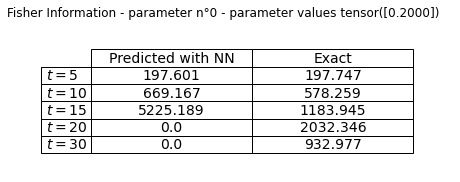

In [109]:
fi_table_multiple([5, 10, 15, 20, 30], torch.tensor([0.2]), ind_param=0, models = (True, [model1, model2, model3], N_COMPS), exact=(True, exact_fi))#, fsp=(True, propensities.stoich_mat, propensities.propensities, 100, None))